In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import re

In [3]:
def clean(df, topk=False):
    df = df[df['State'] == 'finished']

    if topk:
        patterns = ['effective_l0$', 'frac_recovered$', 'mse_loss$', 'loss_original$', 'loss_reconstructed$', 'lr$']
    else:
        patterns = ['l0$', 'frac_recovered$', 'mse_loss$', 'loss_original$', 'loss_reconstructed$', 'lr$']
    filtered_columns = df.columns[df.columns.str.contains('|'.join(patterns))]
    df = df[filtered_columns]
    df.columns = [re.split(r'[./]', col)[-1] for col in df.columns]
    
    if topk:
        l0 = df["effective_l0"].to_numpy().flatten()
    else:
        l0 = df["l0"].to_numpy().flatten()
    mse_loss = df["mse_loss"].to_numpy().flatten()
    frac_recovered = df["frac_recovered"].to_numpy().flatten()
    loss_original = df["loss_original"].to_numpy().flatten()
    loss_reconstructed = df["loss_reconstructed"].to_numpy().flatten()
    delta_ce = loss_reconstructed - loss_original
    lr = df["lr"].to_numpy().flatten()

    data = np.array([l0, mse_loss, frac_recovered, delta_ce, lr]).T
    df = pd.DataFrame(data, columns=['l0', 'mse_loss', 'frac_recovered', 'delta_ce', 'lr'])
    df = df.sort_values(by='l0')
    return df

In [4]:
df_gated_1e3 = pd.read_csv("primary-gated-1e-3.csv")
df_gated_1e3 = clean(df_gated_1e3)

df_gated_3e4 = pd.read_csv("primary-gated-3e-4.csv")
df_gated_3e4 = clean(df_gated_3e4)

df_gated_5e5 = pd.read_csv("primary-gated-5e-5.csv")
df_gated_5e5 = clean(df_gated_5e5)

In [5]:
df_gated_1e3

,l0,mse_loss,frac_recovered,delta_ce,lr
1,7.193970,3240.766846,0.932264,0.970655,0.001
0,14.755737,2245.533203,0.967588,0.454872,0.001
3,25.782349,1692.371460,0.981767,0.261271,0.001
2,38.939209,1338.382324,0.987763,0.171742,0.001
5,62.830811,1121.413208,0.990811,0.131681,0.001
4,92.778931,1114.670532,0.992219,0.109204,0.001
7,173.961060,779.904785,0.994285,0.081898,0.001
6,273.841797,684.512695,0.994872,0.071968,0.001
9,380.192261,580.014404,0.994596,0.077437,0.001
8,481.456787,518.015137,0.995270,0.066379,0.001


In [6]:
df_gated_3e4

,l0,mse_loss,frac_recovered,delta_ce,lr
3,8.206787,3492.701172,0.925540,1.067000,0.0003
2,12.566650,2559.174561,0.957938,0.590303,0.0003
5,23.200928,1837.467163,0.978590,0.306804,0.0003
4,48.888062,1253.766602,0.990122,0.138623,0.0003
7,82.661621,950.446960,0.993387,0.094764,0.0003
1,104.404663,870.095398,0.994713,0.075755,0.0003
0,127.900146,791.554932,0.995353,0.065212,0.0003
6,159.738525,710.653320,0.996061,0.055286,0.0003
9,289.694336,508.336914,0.997255,0.039334,0.0003
8,529.562744,278.480408,0.998424,0.022115,0.0003


In [7]:
df_gated_5e5

,l0,mse_loss,frac_recovered,delta_ce,lr
1,11.570068,3412.411621,0.930648,0.993806,0.00005
0,24.208984,2357.885254,0.966575,0.469090,0.00005
3,35.643066,1717.088257,0.982343,0.253030,0.00005
2,86.309326,1438.067871,0.987743,0.172023,0.00005
9,95.274292,1815.492676,0.980728,0.276160,0.00005
8,308.446899,1053.774658,0.992645,0.103228,0.00005
6,523.408447,969.706726,0.992790,0.101188,0.00005
7,530.961914,447.710632,0.997674,0.033338,0.00005
4,733.010620,15.964256,0.999646,0.004969,0.00005
5,805.203491,48.076820,0.999506,0.007079,0.00005


## Plotting

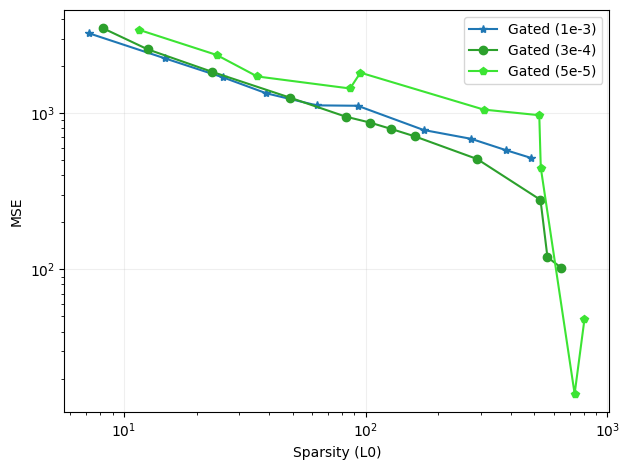

In [7]:
plt.plot(df_gated_1e3['l0'], df_gated_1e3['mse_loss'], label='Gated (1e-3)', marker='*', color='#1f77b4')
plt.plot(df_gated_3e4['l0'], df_gated_3e4['mse_loss'], label='Gated (3e-4)', marker='o', color='#2ca02c')
plt.plot(df_gated_5e5['l0'], df_gated_5e5['mse_loss'], label='Gated (5e-5)', marker='p', color='#3ce433')

plt.xscale('log')
plt.yscale('log')

plt.xlabel("Sparsity (L0)")
plt.ylabel("MSE")

plt.legend()

plt.grid(True, which="major", ls="-", alpha=0.2)


plt.tight_layout()
plt.savefig("gated_l0_mse.png")
plt.show()

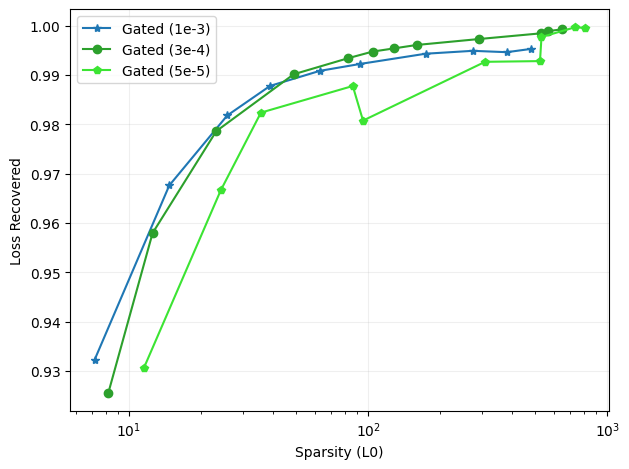

In [8]:
plt.plot(df_gated_1e3['l0'], df_gated_1e3['frac_recovered'], label='Gated (1e-3)', marker='*', color='#1f77b4')
plt.plot(df_gated_3e4['l0'], df_gated_3e4['frac_recovered'], label='Gated (3e-4)', marker='o', color='#2ca02c')
plt.plot(df_gated_5e5['l0'], df_gated_5e5['frac_recovered'], label='Gated (5e-5)', marker='p', color='#3ce433')

plt.xscale('log')
#plt.yscale('log')

plt.xlabel("Sparsity (L0)")
plt.ylabel("Loss Recovered")

plt.legend()

plt.grid(True, which="major", ls="-", alpha=0.2)


plt.tight_layout()
plt.savefig("gated_l0_lossrec.png")
plt.show()

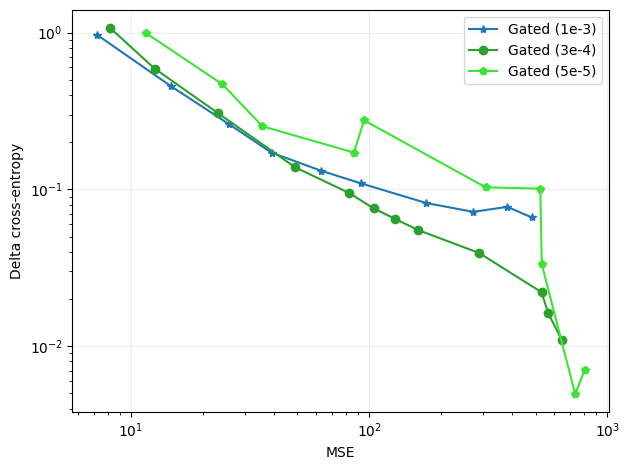

In [9]:
plt.plot(df_gated_1e3['l0'], df_gated_1e3['delta_ce'], label='Gated (1e-3)', marker='*', color='#1f77b4')
plt.plot(df_gated_3e4['l0'], df_gated_3e4['delta_ce'], label='Gated (3e-4)', marker='o', color='#2ca02c')
plt.plot(df_gated_5e5['l0'], df_gated_5e5['delta_ce'], label='Gated (5e-5)', marker='p', color='#3ce433')


plt.xscale('log')
plt.yscale('log')

plt.xlabel("MSE")
plt.ylabel("Delta cross-entropy")

plt.legend()

plt.grid(True, which="major", ls="-", alpha=0.2)


plt.tight_layout()
plt.savefig("gated_mse_deltace.png")
plt.show()